<a href="https://colab.research.google.com/github/Salma-Jamal/EDA-Customer-Traffic-Prediction/blob/main/Customer-Traffic-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
!wget https://cdn.discordapp.com/attachments/907484415305875488/907488034763718676/bank_trafic_timestamp.csv

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objs as go 
import os
import warnings     
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

#Read dataframe

Customer Traffic Prediction Dataset
- Timestamp : Date
- count : count of customers
- window : at which window

In [ ]:
df = pd.read_csv('/content/bank_trafic_timestamp.csv')

In [ ]:
df.head()

,timestamp,count,window
0,2019-09-26,764,1
1,2019-09-26,109,8
2,2019-09-26,118,10
3,2019-09-26,119,7
4,2019-09-26,118,11


In [ ]:
from datetime import datetime
def convert_d(date):
  datetime_object = datetime.strptime(date, '%Y-%m-%d')
  return datetime_object

In [ ]:
# Convert timestamp column from string to date

df.timestamp = df.timestamp.apply(convert_d)

In [ ]:
# Add new columns for Day, month and year

df['day'] = df['timestamp'].map(lambda x: x.day)
df['month'] = df['timestamp'].map(lambda x: x.month)
df['year'] = df['timestamp'].map(lambda x: x.year)

In [ ]:
df.head()

,timestamp,count,window,day,month,year
0,2019-09-26,764,1,26,9,2019
1,2019-09-26,109,8,26,9,2019
2,2019-09-26,118,10,26,9,2019
3,2019-09-26,119,7,26,9,2019
4,2019-09-26,118,11,26,9,2019


Split dataframe by year

In [ ]:
df_19 =df[df.year == 2019]
df_20 =df[df.year == 2021]
df_21 =df[df.year == 2020]

df_19.reset_index(inplace=True)
df_20.reset_index(inplace=True)
df_21.reset_index(inplace=True)

Total Count of Customers in each Year

In [ ]:
count_cust_19 = df_19['count'].sum()
count_cust_20 = df_20['count'].sum()
count_cust_21 = df_21['count'].sum()

#Graphs

**Count Of Customers In Each Year**


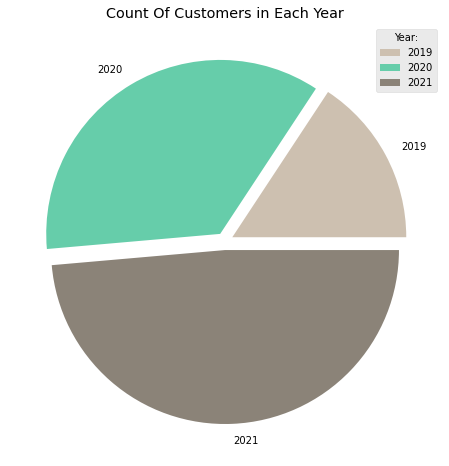

In [ ]:
# Count of each label
y = [count_cust_19,count_cust_20,count_cust_21]

# labels
mylabels = ["2019", "2020", "2021"]

# Spaces between labels
myexplode = [0.05, 0.05, 0.05]

# colors
mycolors = ["#CDC0B0", "#66CDAA", "#8B8378"]

plt.pie(y, labels = mylabels, explode = myexplode ,colors=mycolors)

plt.legend(title = "Year:")

plt.title('Count Of Customers in Each Year')

# gcf: get current figure to adjust size of the figure
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

***Count Of Customers In Each month in 2019,2020,2021***

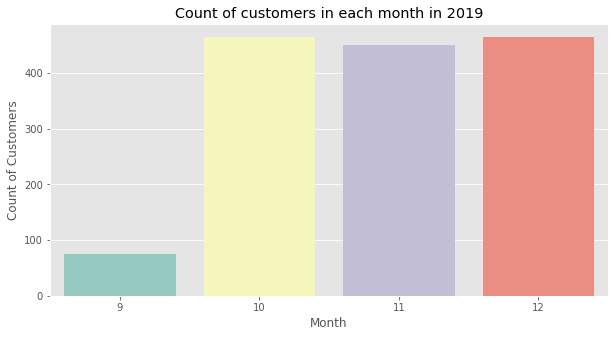

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='month', data=df_19,palette="Set3").set(title="Count of customers in each month in 2019",xlabel="Month",ylabel = "Count of Customers")
plt.show()

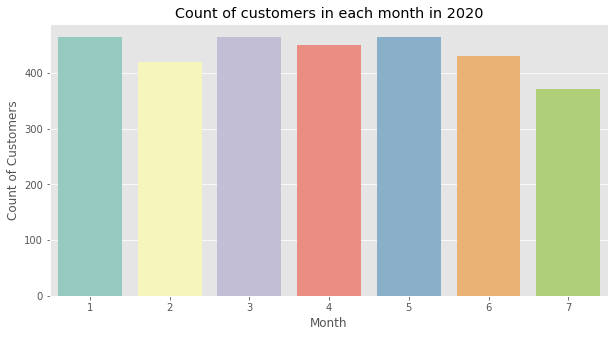

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='month', data=df_20,palette="Set3").set(title="Count of customers in each month in 2020",xlabel="Month",ylabel = "Count of Customers")
plt.show()

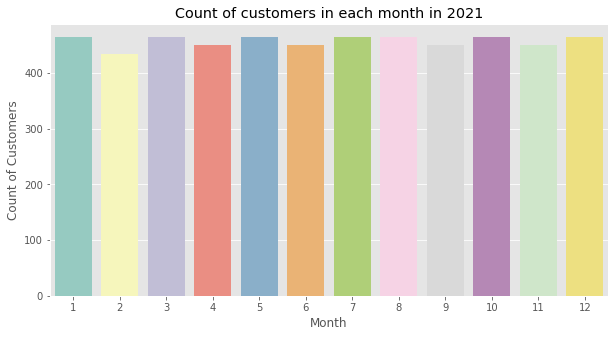

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='month', data=df_21,palette="Set3").set(title="Count of customers in each month in 2021",xlabel="Month",ylabel = "Count of Customers")
plt.show()

***Difference between number of customers in April 2020,2021 because of the pandemic***

In [ ]:
# Dataframe for April 2020 & April 2021
ap_20 = df_20[df_20.month == 4]
ap_21 = df_21[df_21.month == 4]

In [ ]:
# count of cust. at all windows at day 1/4
ap_20[ap_20['day']==1]['count'].sum()

7060

List of count of customers in each day in April 

In [ ]:
lst_ap_20 = []
for i in range(1,30):
  lst_ap_20.append(ap_20[ (ap_20['day']==i)]['count'].sum())

lst_ap_21 = []
for i in range(1,30):
  lst_ap_21.append(ap_21[(ap_21['day']==i)]['count'].sum())

In [ ]:
print(lst_ap_20)

[7060, 0, 0, 8015, 7817, 9602, 7045, 8530, 0, 0, 4916, 5759, 6889, 5035, 5607, 0, 0, 6441, 6763, 7732, 5401, 6187, 0, 0, 0, 7485, 7049, 5238, 0]


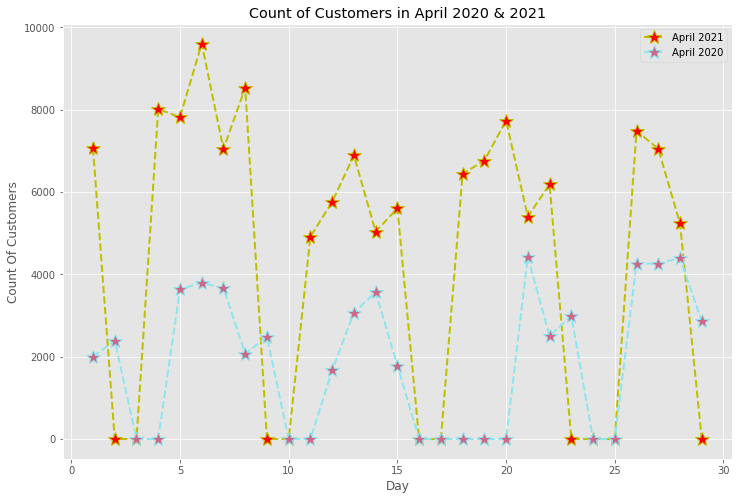

In [ ]:
# x axis
days = np.array([i for i in range(1,30)])

ypoints = np.array(lst_ap_20)
ypoints2 = np.array(lst_ap_21)

plt.plot(days,ypoints,linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=15,linewidth = '2.0')

plt.plot(days,ypoints2,linestyle='--', marker='*', markerfacecolor='#CD6889',color='#8EE5EE',markersize=15,linewidth = '2.0')

plt.xlabel('Day')
plt.title("Count of Customers in April 2020 & 2021")
plt.ylabel('Count Of Customers')
plt.legend(['April 2021', 'April 2020'])
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

***Count Of customers in a month which shows that the largest number of customers is in the beginning of the month and in the weekend "0"***

In [ ]:
jan_21 = df_21[df_21.month == 1]
lst_jan_21 = []
for i in range(1,30):
  lst_jan_21.append(jan_21[(jan_21['day']==i)]['count'].sum())

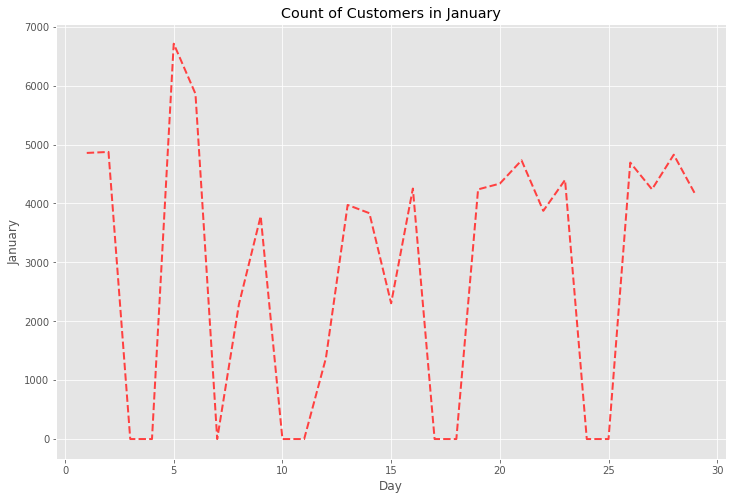

In [ ]:
days = np.array([i for i in range(1,30)])

y = np.array(lst_jan_21)

plt.plot(days, y, linestyle = 'dashed',linewidth = '2.0',markerfacecolor='b',color='#FF4040')


plt.title("Count of Customers in January")
plt.xlabel("Day")
plt.ylabel("January")

fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()